# ⬛  TRABAJO FINAL -  Predicción del precio de celulares con Machine Learning

---



CURSO DATA.UY

Entrega: Mayo 2025

Alumno: Guillermo Sangiovanni

URL DATASET: Smartphone_sales
https://raw.githubusercontent.com/guillesangio/dataset/refs/heads/main/smartphones.csv


# ⭕ PROBLEMA DEL TRABAJO:

---



---

## INTRODUCCION
Vivimos en un mercado tecnológico altamente competitivo y en constante evolución, donde los teléfonos celulares presentan una enorme variedad en cuanto a características técnicas, marcas y precios.

Esta diversidad hace que sea cada vez más difícil establecer precios adecuados de forma objetiva, tanto para vendedores como para compradores.

Además, muchas veces el consumidor no tiene certezas sobre si el precio de un celular es justo en relación a sus caracteristicas, o si está pagando principalmente por la marca.

Es común encontrar dispositivos con marcas no tan reconocidas que ofrecen las mismas prestaciones que modelos mucho más costosos, generando una percepción de valor muchas veces subjetiva o desalineada con las capacidades reales del producto.




---



---



A esto se suma que el mercado es altamente volátil: los precios fluctúan constantemente y dependen de múltiples factores como:



*   Marca
*   Memoria RAM
*   Memoria de almacenamiento
*   Modelo
*   Color
*   Estado de liberación (si es libre o que funciona unicamente con una empresa)
*   Y otras características técnicas o comerciales

























---



---
En resumen, existe una necesidad de **objetivar** el precio de los celulares en base a sus características técnicas y no sólo la marca. Este proyecto abordará esa necesidad desarrollando un modelo que ayude a predecir precios justos, brindando tanto a vendedores como a compradores una guía basada en datos.

**Variable a predecir:** Precio final del celular en Dolares


# ▶ ¿QUE QUEREMOS RESOLVER?


---



---

## OBJETIVO DEL ANALISIS
El objetivo es desarrollar un modelo de regresion capaz de predecir el precio final de un celular, a partir de sus características técnicas y comerciales, ayudando en este caso en particular al usuario y comprador.

De esta manera, el modelo podrá servir como herramienta de apoyo para identificar si un smartphone está sobrevaluado o subvaluado en función de sus especificaciones, atendiendo al problema planteado

- TIPO DE PROBLEMA: Aprendizaje supervisado de regresión

  (Es supervisado porque el dataset seleccionado cuenta con precio real y ademas es una regresion porque el precio es un numero continuo)

- VARIABLE OBJETIVO: Precio final del celular

  (Valor salida del modelo)


# 📶 EXPLORACION DEL DATASET

Importacion de librerias y iniciar la carga del dataset

In [70]:
#Tratamiento de datos
import numpy as np
import pandas as pd

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
url = "https://raw.githubusercontent.com/guillesangio/dataset/refs/heads/main/smartphones.csv"
df = pd.read_csv(url)

#Dataset obtenido de pagina kaggle (https://www.kaggle.com/code/refiaozturk/smartphone-market-insights-price-ram-more/notebook)

### 🔍 Vista del DATASET utilizado
A continuación, se muestran algunas filas del dataset:


In [72]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [73]:
# mostrar los nombres de las columnas del dataframe
df.columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final Price'],
      dtype='object')

El dataset utilizado contiene información técnica y de precios sobre distintos modelos de smartphones. Las variables incluidas son, entre otras:

- Smarphone: Nombre y caracteristicas del celular

- Brand: Marca del dispositivo

- Model: Modelo específico

- RAM: Memoria RAM (GB)

- Storage: Almacenamiento interno del celular (GB)

- Color: Color del dispositivo

- Free: Describe si el celular es libre o de compania

- Final Price: Precio final del dispositivo (USD)

Cantidad de filas y columnas del df:

In [74]:
df.shape

(1816, 8)

### 🔍 Vista interactiva del dataset
Dado que no se cuenta con acceso Google Sheets, se utiliza la extensión "data_table" para explorar el dataset de manera interactiva dentro del mismo notebook.
Con esta opcion podemos filtrar datos y observar el dataset completo si es lo que se quiere.

In [75]:
from google.colab import data_table
data_table.DataTable(df)

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


### ℹ️ Información general del dataset

In [76]:
df.info() #Información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


Faltante de datos

In [77]:
df.isna().sum().sort_values()

,0
Smartphone,0
Brand,0
Model,0
Color,0
Final Price,0
Free,0
Storage,25
RAM,483


⭐ NOTAS:

Total de filas - 1816

- En memoria RAM hay faltante de datos o nulos. 1816 totales 1333 datos (Faltante de 483 - 26%)

- En storage hay faltante de datos o nulos. 1816 totales 1791 datos (Faltante de 25 - 2.6%)

Datos categoricos: Smartphone, Brand, Model, Color y Free

Datos numericos: RAM, Storage, Final Price

### ℹ️ Información descriptiva del dataset

Estadistica descriptiva:

# ✅ Calidad de datos

In [78]:
df.describe()

,RAM,Storage,Final Price
count,1333.00000,1791.000000,1816.000000
mean,5.96099,162.652150,492.175573
std,2.66807,139.411605,398.606183
min,1.00000,2.000000,60.460000
25%,4.00000,64.000000,200.990000
50%,6.00000,128.000000,349.990000
75%,8.00000,256.000000,652.717500
max,12.00000,1000.000000,2271.280000


⭐ NOTAS:

Precio promedio: 492 dolares (Precios desde los 60 a los 2271 dolares)

Memoria RAM mas utilizada: 6 GB (RAM desde 1 GB a 12GB)

Memoria de almacenamiento mas utilizada: 128 GB (Almacenamiento desde los 2 GB a los 1000 GB)




Tipos de datos del df:

In [79]:
df.dtypes

,0
Smartphone,object
Brand,object
Model,object
RAM,float64
Storage,float64
Color,object
Free,object
Final Price,float64


⭐ NOTAS:

Variable categoricos: Smartphone, Brand, Model,Color y Free

Variable numericos: RAM, Storage, Final Price

# 📶 ANALISIS DE DATOS EXPLORATORIO





🟦 Correlacion entre variables numericas

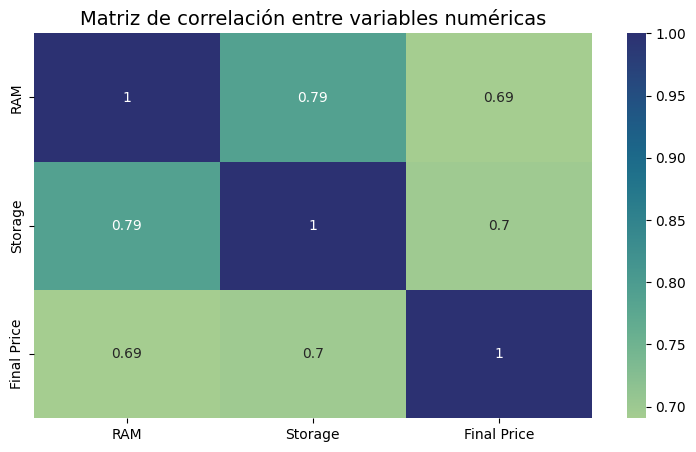

In [80]:
correlacion = df.corr(numeric_only=True)
plt.figure(figsize=(9, 5))
sns.heatmap(correlacion, annot=True, cmap='crest')
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.show()

⭐ NOTAS:

Correlaciones obtenidas:

- Relacion entre RAM y Precio final = A mayor RAM mayor es el precio pero con una
correlacion de 0.69

- Relacion entre Almacenamiento (Storage) y Precio final = A mayor almacenamiento maor es el precio, esta correlacion es bastante alta, 0.70.

- Relacion entre RAM y almacenamiento = A mayor RAM, mayor es el almacenamiento, esta es una correlacion bastante fuerte de 0.79.



🟦 Distribucion del Precio Final de los Celulares

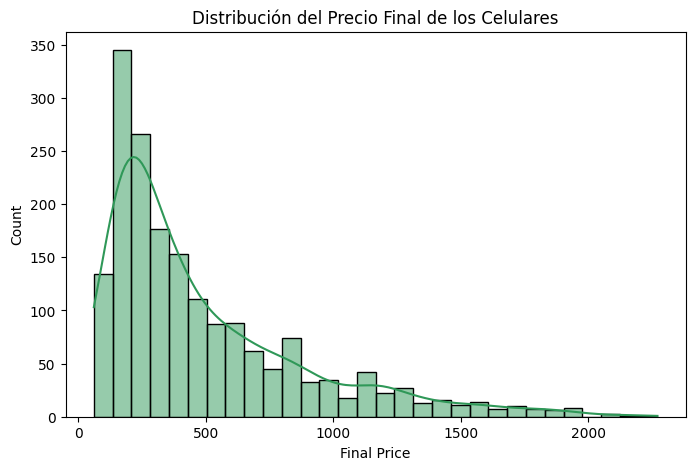

In [81]:
# Distribución variable target
# Crea una figura y un eje (subplot) con un tamaño específico
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# Dibuja un histograma de la columna 'Final Price' del DataFrame 'df',
# e incluye la curva de densidad (kde) sobre el histograma
sns.histplot(data=df, x='Final Price', kde=True, ax=ax, color=plt.cm.BuGn(0.7))

# Asigna un título al gráfico
ax.set_title("Distribución del Precio Final de los Celulares")

# Asigna una etiqueta al eje x
ax.set_xlabel('Final Price');


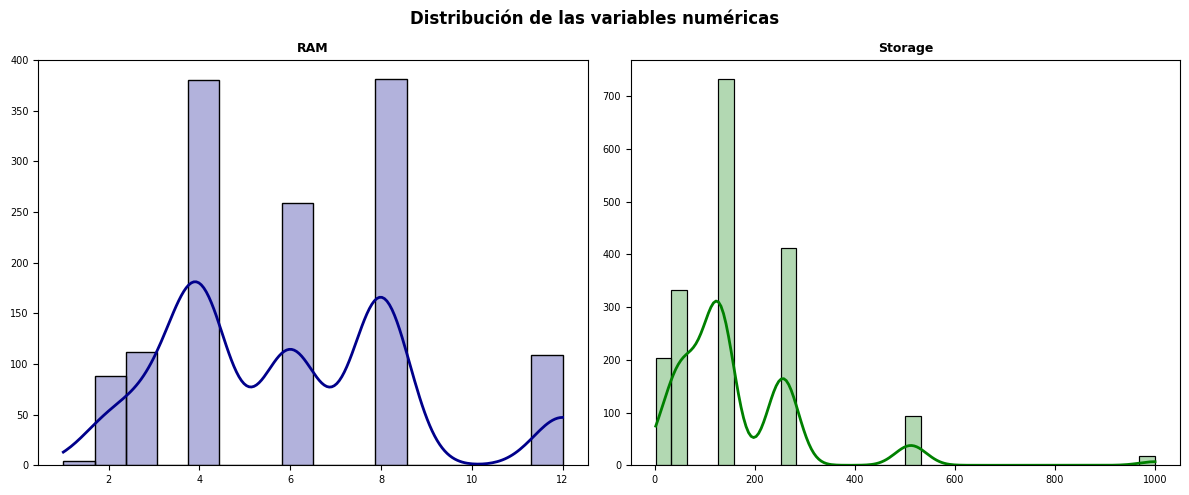

In [82]:
# Obtenemos las columnas numéricas, excepto 'Final Price'
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Final Price')

# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color=['darkblue', 'green'][i],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize=9, fontweight="bold")
    axes[i].tick_params(labelsize=7)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Ajustes finales
fig.tight_layout()
plt.subplots_adjust(top=0.88)
fig.suptitle('Distribución de las variables numéricas', fontsize=12, fontweight="bold");
plt.show()

✍ En este grafico observamos la distribución de precios. Se aprecia una concentración en la gama media a baja, con algunos outliers hacia precios más altos.


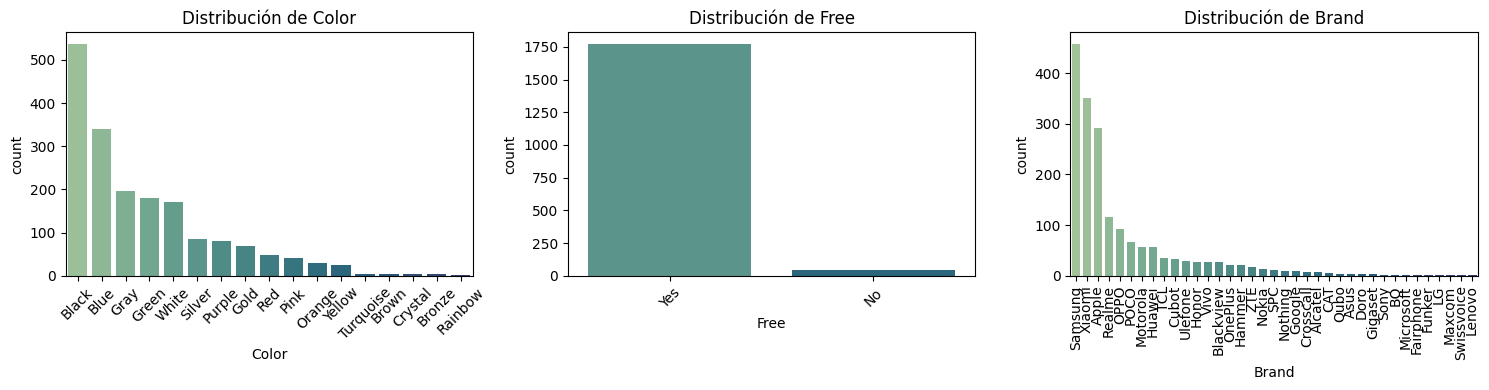

In [83]:
# Definir manualmente las columnas categóricas que querés mostrar
columnas_categoricas = ["Color", "Free", "Brand"]

# Configurar grilla
n_cols = 3
n_rows = 1

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Graficar cada variable categórica
for i, col in enumerate(columnas_categoricas):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="crest")
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

🟦 Distribucion de Precios por la Marca del celular

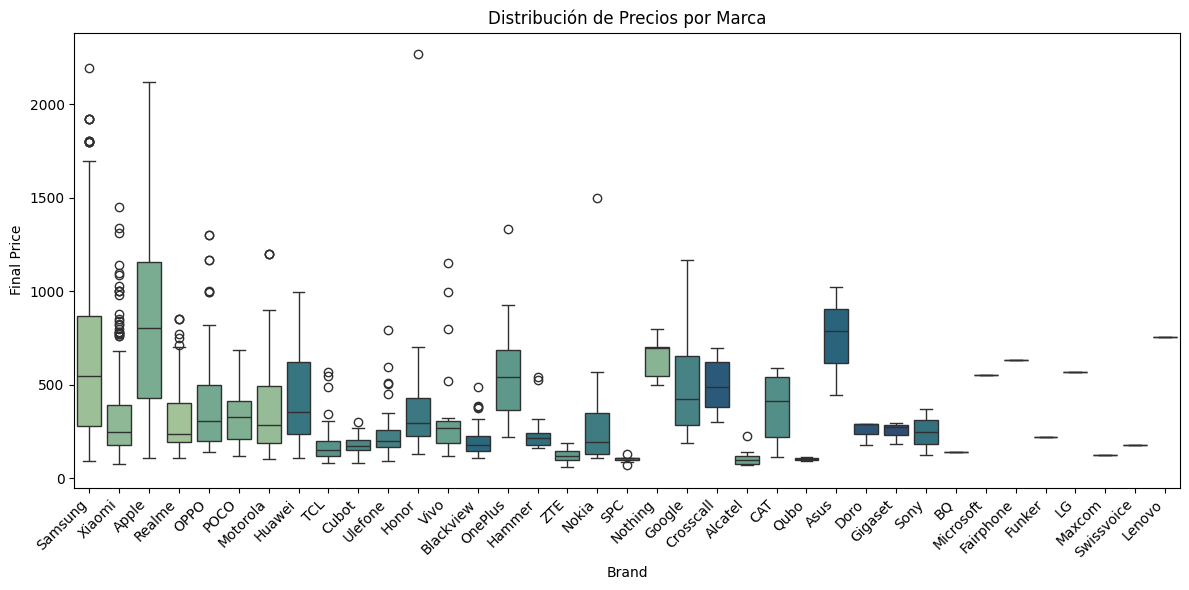

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Final Price", data=df, order=df["Brand"].value_counts().index, hue="Brand",palette="crest")
plt.title("Distribución de Precios por Marca")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

✍ En este boxplot podemos comparar el precio de los celularas de distintas marcas. Se observan marcas con mayor dispersión y otras más estables en su rango de precios.



🟦 Distribucion de Precios por la RAM que cuenta el celular

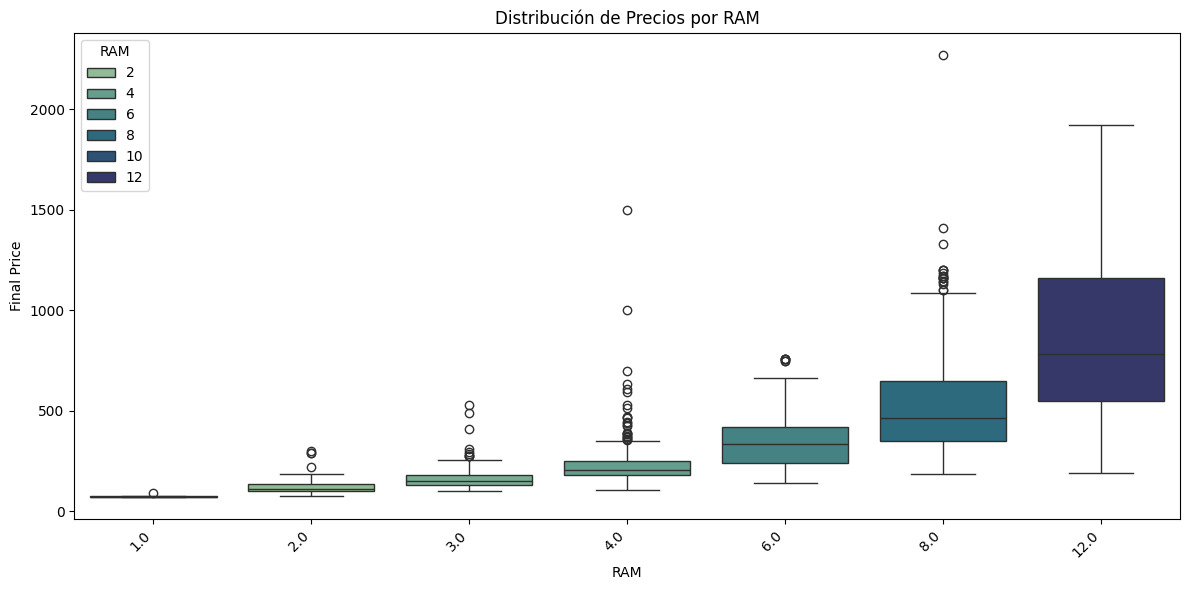

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="RAM", y="Final Price", data=df, hue="RAM",palette="crest")
plt.title("Distribución de Precios por RAM")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

✍ Existe una ascendente general que determina que a mayor RAM, mayor es el precio promedio de los celulares.

✍ En la categoria 0 que equivale a 6 GB de RAM encontramos una alta dispersion, por lo cual con la RAM antes mencionada encontraremos precioso muy altamente disparejos (Muy altos o muy bajos), quizas este punto determina que celulares de alta gama utilizan esa RAM y tambien aquellos celulares clasificados como gama media o baja.



🟦 Distribucion de Precios por Almacenamiento que tiene el celular

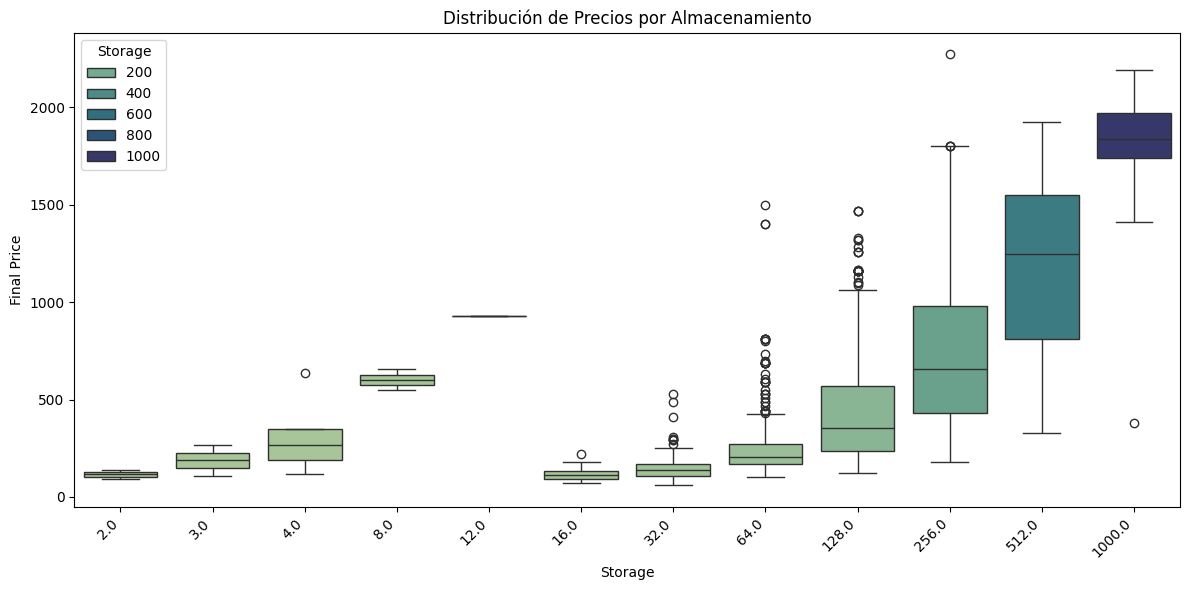

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Storage", y="Final Price", data=df, hue="Storage",palette="crest")
plt.title("Distribución de Precios por Almacenamiento")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

🟦 Cantidad de celulares que cuenta cada Marca el Dataset



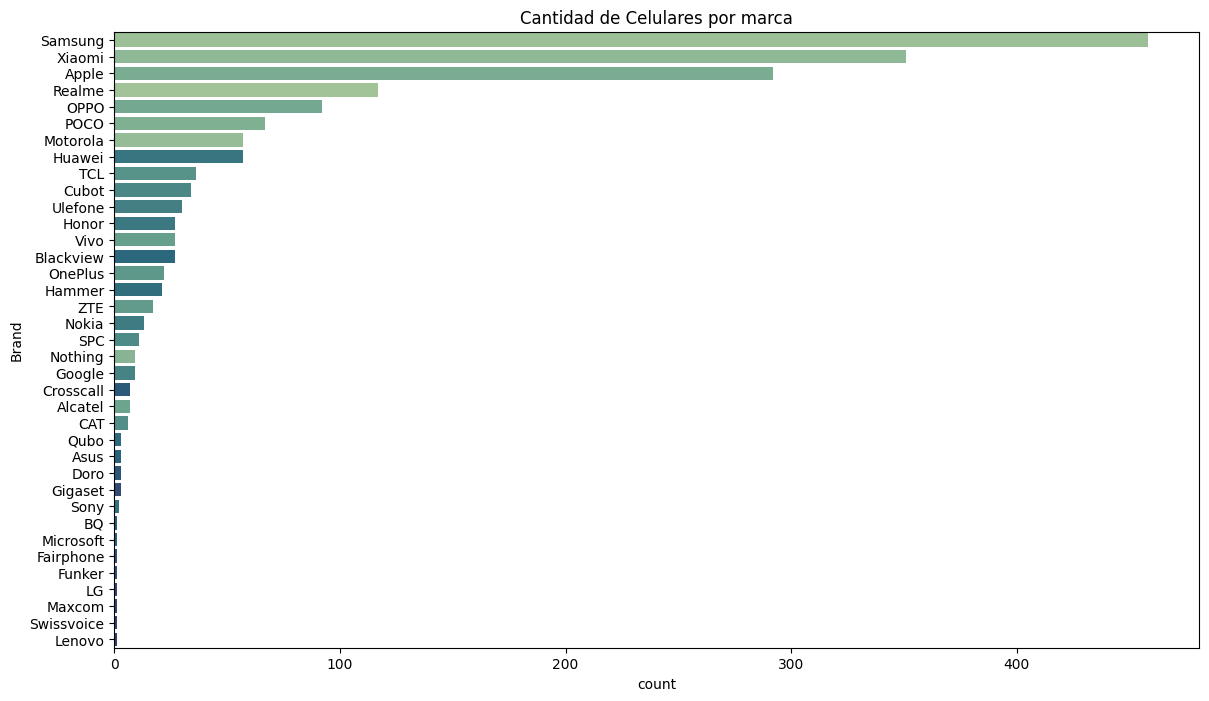

In [87]:
plt.figure(figsize=(14, 8))
sns.countplot(y="Brand", data=df, order=df["Brand"].value_counts().index, hue="Brand",palette="crest")
plt.title("Cantidad de Celulares por marca")
plt.show()

✍ Samsung, Xiaomi y Apple son las marcas más representadas en tu dataset.

✍ Hay muchas marcas con muy pocos modelos (por debajo de 10 unidades), como Lenovo, Swissvoice o Funker.

🔎 Se tendria que evaluar en un futuro si el modelo a realizar debido a la falta de datos de algunas marcas puede afectar el entrenamiento


# 📶 ENTRENAMIENTO DE MODELOS DE REGRESION

## Metodología y Selección de Modelos

Se probarán diferentes algoritmos de regresión con el fin de predecir el precio de los dispositivos:

- **Regresión Lineal**: modelo simple que sirve como punto de partida para comparar con otros métodos.
- **Random Forest Regressor**: modelo más complejo que puede detectar relaciones no lineales entre las variables.
Validación del Modelo con K-Fold Cross Validation
- **Validación del Modelo con K-Fold Cross Validation** :utilizaremos 5 folds (k=5) para asegurarnos de que cada parte del conjunto de datos actúe como conjunto de validación en una iteración distinta, reduciendo así el riesgo de sobreajuste y obteniendo una métrica más estable.

Además de dividir los datos en train y test (70% - 30%), aplicaremos validación cruzada con K-Fold para evaluar la robustez de nuestros modelos.

La evaluación de estos modelos se realizará utilizando métricas como R², MAE y RMSE.

## Imputación de valores faltantes:

Se imputaron los valores faltantes de RAM y Storage utilizando un método de KNN-vecinos más cercanos (KNN Imputer), lo que evita descartar filas y reduce el sesgo en comparación con imputar simplemente con la media.

¿QUE HACEMOS?
- Separamos las columnas en numericas / categoricas
- Pipeline para los datos numericos (que son los faltantes)
  
  -Se imputan los valores usando KNN
  -Se estandarizan los datos
-Se aplica OneHotEncoder



In [88]:
# Definir columnas
columnas_numericas = ['RAM', 'Storage']
columnas_categoricas = ['Brand', 'Color']

# Pipeline para datos numéricos: imputación y escalado
pipeline_numerico = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])
# Definir el preprocesador (imputación + escalado para numérico y codificación para categórico)
preprocesador = ColumnTransformer(
    transformers=[
        ("num", pipeline_numerico, columnas_numericas),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), columnas_categoricas)
    ]
)

In [89]:
# División train/test
X = df[columnas_numericas + columnas_categoricas]
y = df["Final Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el pipeline para Regresión Lineal usando el preprocesador definido
pipeline_rl = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", LinearRegression())
])

In [90]:
# Entrenar modelo
pipeline_rl.fit(X_train, y_train)

# Predicciones
y_pred = pipeline_rl.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # calcular raíz cuadrada a mano
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} USD")
print(f"RMSE: {rmse:.2f} USD")
print(f"R²: {r2:.3f}")


MAE: 180.35 USD
RMSE: 253.03 USD
R²: 0.618


In [91]:
# Configurar la validación cruzada para Regresión Lineal
kf_rl = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

scores_r2_rl = cross_val_score(pipeline_rl, X, y, scoring='r2', cv=kf_rl)
scores_mae_rl = cross_val_score(pipeline_rl, X, y, scoring=mae_scorer, cv=kf_rl)

print(f"R² promedio (CV=5)  : {scores_r2_rl.mean():.3f} ± {scores_r2_rl.std():.3f}")
print(f"MAE promedio (CV=5) : {-scores_mae_rl.mean():.2f} USD")

R² promedio (CV=5)  : 0.604 ± 0.031
MAE promedio (CV=5) : 176.68 USD


In [92]:
# Definir el pipeline de Random Forest
pipeline_randomforest = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo de Random Forest
pipeline_randomforest.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = pipeline_randomforest.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f} USD")
print(f"RMSE: {rmse_rf:.2f} USD")
print(f"R²: {r2_rf:.3f}")

MAE: 163.22 USD
RMSE: 250.62 USD
R²: 0.625


In [93]:
# Validación cruzada para Random Forest
kf_rf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

scores_r2_rf = cross_val_score(pipeline_randomforest, X, y, scoring='r2', cv=kf_rf)
scores_mae_rf = cross_val_score(pipeline_randomforest, X, y, scoring=mae_scorer, cv=kf_rf)

print(f"R² promedio (CV=5)  : {scores_r2_rf.mean():.3f} ± {scores_r2_rf.std():.3f}")
print(f"MAE promedio (CV=5) : {-scores_mae_rf.mean():.2f} USD")

R² promedio (CV=5)  : 0.621 ± 0.034
MAE promedio (CV=5) : 155.73 USD


- **MAE (Mean Absolute Error)**: muestra cuántos dólares, en promedio, se equivoca el modelo al predecir el precio.
- **RMSE (Root Mean Squared Error)**: es parecido al MAE, pero da más importancia a los errores grandes.
- **R² (Coeficiente de Determinación)**: indica qué tanto del precio real puede explicar el modelo con los datos que tiene.


# 📊 EVALUACION DEL ANALISIS

## ✅ RESULTADOS OBTENIDOS



### Resultados en el Conjunto de Test (70/30)


---


**Regresión Lineal**	       
- MAE Test (Dolares) - 	$ 180.35

- RMSE Test (Dolares) -  $ 253.03
- R² Test - 0.618


**Random Forest**
- MAE Test (USD) -	$ 163.22

- RMSE Test (USD)	- $ 250.62
- R² Test - 0.625


### Resultados Promedio con Validación Cruzada (K-Fold=5)


---

**Regresión Lineal**

- R² promedio (CV=5)  : 0.604 ± 0.031

- MAE promedio (CV=5) : $ 176.68

**Random Forest**
- R² promedio (CV=5)  : 0.621 ± 0.034

- MAE promedio (CV=5) : $ 155.73




## Graficos Precios Real vs Precio Predicho

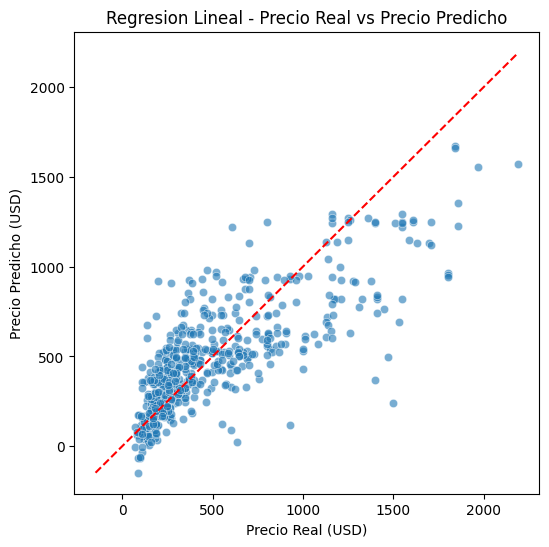

In [94]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title("Regresion Lineal - Precio Real vs Precio Predicho")
plt.xlabel("Precio Real (USD)")
plt.ylabel("Precio Predicho (USD)")
plt.show()

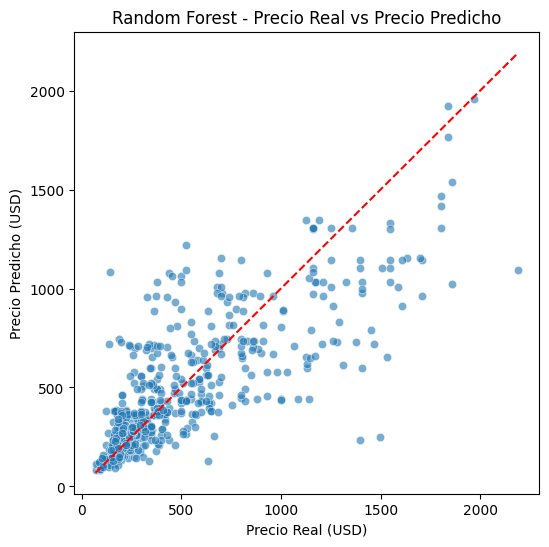

In [95]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
min_val_rf = min(y_test.min(), y_pred_rf.min())
max_val_rf = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], 'r--')



plt.title("Random Forest - Precio Real vs Precio Predicho")
plt.xlabel("Precio Real (USD)")
plt.ylabel("Precio Predicho (USD)")
plt.show()

## 📑 CONCLUSIONES FINALES


### ▶ CONCLUSIONES TEORICAS
---



- Ambas técnicas (Regresión Lineal y Random Forest) muestran un ajuste moderado, con valores de R² alrededor de 0.60–0.62. Esto significa que explican entre el 60% y el 62% de la variabilidad en el precio de los teléfonos.

---



- El MAE oscila entre unos 163 y 180 USD (dependiendo del método y si es CV o test final).

---



- La validación cruzada (CV=5) como en el test final (70/30), Random Forest logra un MAE más bajo (es decir, se equivoca menos en promedio) y un R² algo mayor.


---







### ▶ CONCLUSIONES PRACTICAS


---
- Con R² cercano a 0.60–0.62, el modelo está capturando algo más de la mitad de la variación en el precio de los celulares, quizas la recoleccion de datos para df podria ser mas robusta en el sentido de sumarle mayor cantidad de variables ejemplo: fecha de lanzamineto, camara, bateria, algun tipo de conectividad importante como NFC o Bluethoot.


---


- Un error promedio de 163–180 USD puede ser relevante dependiendo del rango de precios. Quizas la alta variacion de precios o mismo la volatilidad de los valores tanto de RAM como de almcacenamiento quizas el modelo pueda tener errores.


---



- Quizas a partir de los resultados del MAE un resultado de error entre los 163 - 180 en celulares de alto costo sea un resultado aceptable, quizas en los celulares de menor costo esto sea muy dificil de utilizar.



# ✅ Análisis de errores por rangos de precio

¿Que queremos entender? Con este grafico podemos observar cómo varía el error del modelo dependiendo del rango de precios. Esto permite identificar si el modelo tiene dificultades particulares para predecir celulares en ciertos segmentos de precio (bajo, medio o alto).

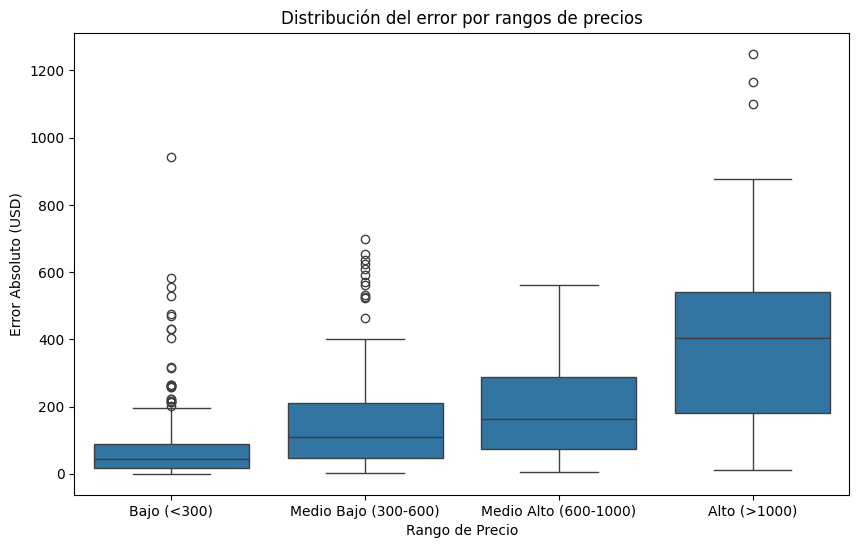

In [96]:
# Crear categorías por rango de precios
bins = [0, 300, 600, 1000, 2500]
labels = ['Bajo (<300)', 'Medio Bajo (300-600)', 'Medio Alto (600-1000)', 'Alto (>1000)']
test_results = X_test.copy()
test_results['Precio Real'] = y_test
test_results['Predicción RF'] = y_pred_rf
test_results['Error Absoluto'] = abs(test_results['Precio Real'] - test_results['Predicción RF'])
test_results['Rango Precio'] = pd.cut(test_results['Precio Real'], bins=bins, labels=labels)

# Visualizar errores por rango de precios
plt.figure(figsize=(10,6))
sns.boxplot(x='Rango Precio', y='Error Absoluto', data=test_results)
plt.title('Distribución del error por rangos de precios')
plt.ylabel('Error Absoluto (USD)')
plt.xlabel('Rango de Precio')
plt.show()

# 📁 Prueba Final del entrenamiento para el usuario

In [97]:
import joblib

joblib.dump(pipeline_randomforest, "modelo_celulares.pkl")

['modelo_celulares.pkl']

In [99]:
import joblib
import pandas as pd

# Cargar el pipeline (modelo) desde el archivo .pkl
modelo_celulares = joblib.load("modelo_celulares.pkl")

print("Bienvenido a la predicción del precio de celulares")
print("Por favor, ingrese los siguientes datos:")

# Preguntar al usuario e ingresar datos de forma interactiva
brand = input("Marca (Ejemplo: Samsung, Apple, Realme, Motorola,Realme,Xiaomi,POCO,Alcatel,Asus,Sony,Lenovo): ")
ram = int(input("Memoria RAM (en GB): "))
storage = int(input("Almacenamiento (en GB): "))
color = input("Color (Ejemplo: Black, White, Blue,Gray, Silver, Brozen): ")

# Preparar los datos en un DataFrame con la estructura esperada
data_ejemplo = pd.DataFrame({
    "RAM": [ram],
    "Storage": [storage],
    "Brand": [brand],
    "Color": [color]
})

# Realizar la predicción
prediccion = modelo_celulares.predict(data_ejemplo)

# Imprimir el precio estimado
print(f"Precio estimado: {prediccion[0]:.2f} USD")

Bienvenido a la predicción del precio de celulares
Por favor, ingrese los siguientes datos:
Marca (Ejemplo: Samsung, Apple, Realme, Motorola,Realme,Xiaomi,POCO,Alcatel,Asus,Sony,Lenovo): Asus
Memoria RAM (en GB): 512
Almacenamiento (en GB): 8
Color (Ejemplo: Black, White, Blue,Gray, Silver, Brozen): 
Precio estimado: 871.18 USD
